In [18]:
from spatial_tools import read_seqfish
import spatial_tools.graph as sp
import os
import scanpy as sc

%load_ext autoreload
%autoreload 2
%load_ext nb_black

BASE_PATH = "/home/ina/Hackathon/data/20200909_PublicVisium_giovanni.palla_LIGHWEIGHT"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

Use one of the seqfish slices for demonstration.

In [2]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_ob
adata1 = adata_ob[adata_ob.obs["Field of View"] == 1]

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


<IPython.core.display.Javascript object>

1. Prepare the spatial graph, knn-based as well as radius-based possible.  
2. Compute louvain clusters of the nodes based on alpha * feature_graph + (1 - alpha) * spatial_graph. alpha = 0 corresponds to clustering solely on spatial coordinates, alpha = 1 means clustering on, potentially processed, node features. You should find a value for alpha that results in graph and umap plots where you can see structure in both.
3. A nr_steps parameter different from 0 will smoothen the node features locally by repeatedly multiplying the spatial adjacency matrix to the node features, which means taking weighted averages of the nodes within a nr_steps step neighborhood.

In [3]:
sp.spatial_connectivity(
    adata1,
    n_neigh=15,
    coord_type="seqfish",
)
sp.prepare_data_for_clustering(adata1)
sp.compute_louvain_on_joined_connectivities(adata1, alpha=0.78, nr_steps=0)

<IPython.core.display.Javascript object>

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


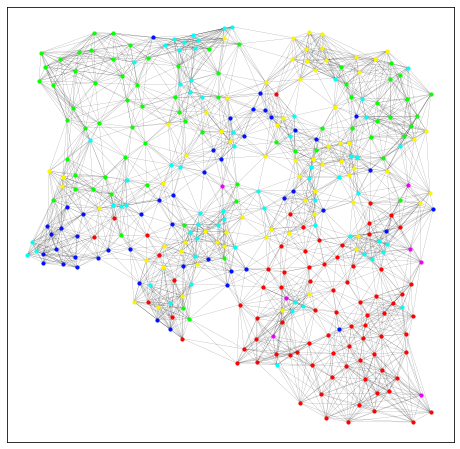

<IPython.core.display.Javascript object>

In [4]:
sp.plot_louvain_on_graph(adata1)

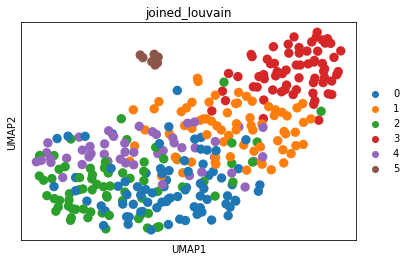

<IPython.core.display.Javascript object>

In [5]:
sp.plot_louvain_on_umap(adata1)

In [16]:
dataset_name = "V1_Adult_Mouse_Brain"
dataset_folder = os.path.join(
    BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla"
)

<IPython.core.display.Javascript object>

In [19]:
adata = sc.read_visium(
    dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5"
)
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<IPython.core.display.Javascript object>

In [23]:
sp.spatial_connectivity(
    adata,
    n_neigh=15,
    coord_type="visium",
)
sp.prepare_data_for_clustering(adata)
sp.compute_louvain_on_joined_connectivities(adata, alpha=0.78, nr_steps=0)

<IPython.core.display.Javascript object>

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


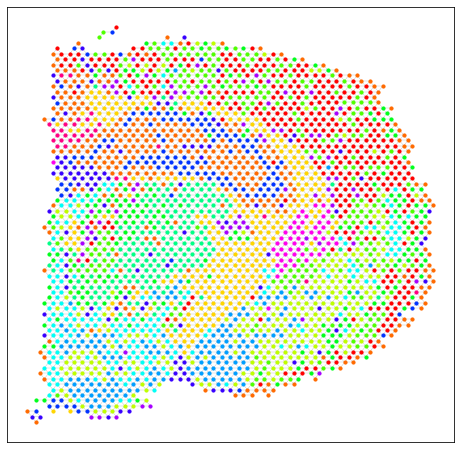

<IPython.core.display.Javascript object>

In [24]:
sp.plot_louvain_on_graph(adata)

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


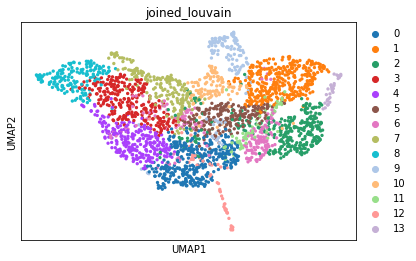

<IPython.core.display.Javascript object>

In [25]:
sp.plot_louvain_on_umap(adata)

To show the effect of the smoothing, we show the results on the Bodenmiller dataset

In [6]:
import sys

sys.path.append("/home/ina/Masterarbeit/code/tissue/")
import tissue.api as tissue
import numpy as np
import anndata

base_path_results = "../../../Masterarbeit/results/basel_zurich/"
buffer_path = "../../../Masterarbeit/code/tissue/buffered_data/buffer/basel_zurich/"
data_origin = "basel_zurich"
grade_name = "grade"
save = None

interpreter = tissue.fits.Interpreter()
interpreter.get_data(
    data_origin=data_origin,
    data_path="",
    buffered_data_path=buffer_path,
    write_buffer=False,
    max_dist=20,
    steps=3,
    target_label=grade_name,
    graph_label_selection=[grade_name],
    graph_covar_selection=[],
    # node_feature_transformation="standardize_per_image",
    node_feature_transformation=None,
    diseased_only=True,
    diseased_as_paired=False,
    node_fraction=1,
    adj_type="full",
    node_labels=True,
    drop_when_missing=[],
)
interpreter.position_matrix = interpreter.data.position_matrix
interpreter.cell_type = {
    key: np.argmax(types, axis=1) if np.sum(types) > 0 else None
    for key, types in interpreter.data.node_types.items()
}

attempting to find buffered data in ../../../Masterarbeit/code/tissue/buffered_data/buffer/basel_zurich/buffered_data_20_3_True_False.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients out of 559 images total
Dropped 0 images with missing relevant target labels

Whole dataset: 559 images from 350 patients. 0 images had a reference image.
Test dataset: 50 images from 35 patients. 0 images had a reference image.
Training dataset: 459 images from 283 patients. 0 images had a reference image.
Validation dataset: 50 images from 32 patients. 0 images had a reference image.



<IPython.core.display.Javascript object>

The graph below shows the cells of one image colored by cell-type-cluster that was computed based on the node features. Below that, the clusters based on smoothened features and raw features are shown. Smoothened clusters are able to find different spots in the image that have the same mix of cells.

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


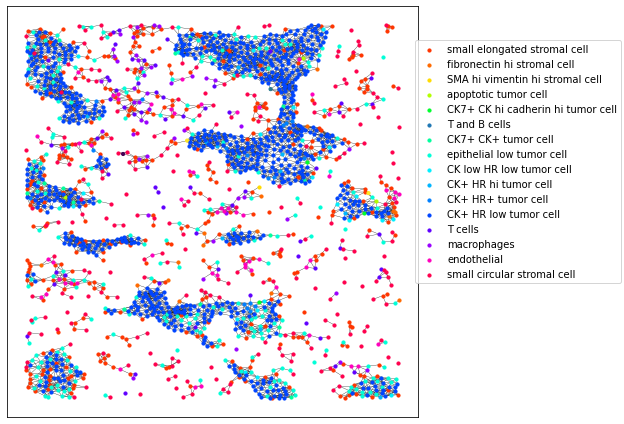

<IPython.core.display.Javascript object>

In [7]:
adata2 = anndata.AnnData(X=interpreter.h["BaselTMA_SP42_181_X6Y5"])
adata2.obsm["spatial"] = interpreter.data.position_matrix["BaselTMA_SP42_181_X6Y5"]
interpreter.plot_graph("BaselTMA_SP42_181_X6Y5")

In [8]:
sp.spatial_connectivity(
    adata2,
    n_neigh=15,
    coord_type="other",
)
sp.prepare_data_for_clustering(adata2)
sp.compute_louvain_on_joined_connectivities(adata2, alpha=0.78, nr_steps=2)

<IPython.core.display.Javascript object>

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


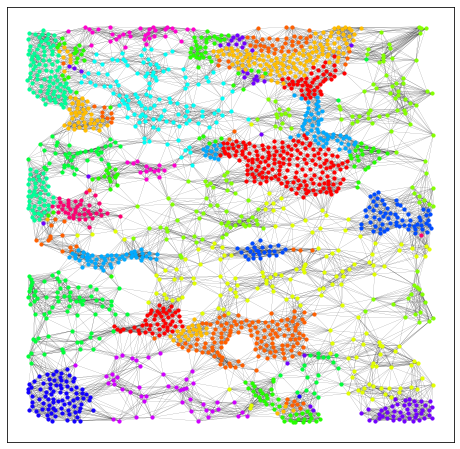

<IPython.core.display.Javascript object>

In [9]:
sp.plot_louvain_on_graph(adata2)

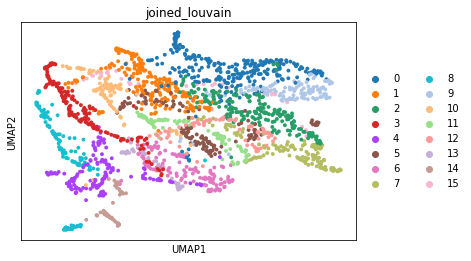

<IPython.core.display.Javascript object>

In [10]:
sp.plot_louvain_on_umap(adata2)

In [11]:
sp.spatial_connectivity(
    adata2,
    n_neigh=15,
    coord_type="other",
)
sp.prepare_data_for_clustering(adata2)
sp.compute_louvain_on_joined_connectivities(adata2, alpha=0.68, nr_steps=0)

<IPython.core.display.Javascript object>

/home/ina/anaconda3/envs/tissue/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


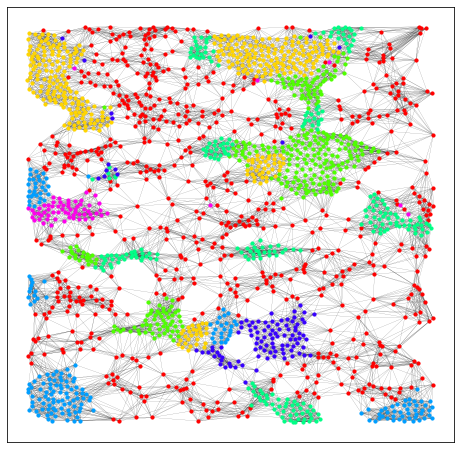

<IPython.core.display.Javascript object>

In [12]:
sp.plot_louvain_on_graph(adata2)

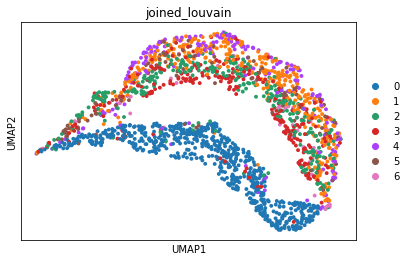

<IPython.core.display.Javascript object>

In [13]:
sp.plot_louvain_on_umap(adata2)